## Examen Parcial de Inteligencia Artificial 

Esta es la segunda parte del examen parcial de Inteligencia Artificial que abarca aspectos teóricos del curso.

* Tienes 180 minutos como máximo para responder tantas preguntas como sea posible. No se ́admiten examenes fuera de tiempo. ́

* Escribe en este cuaderno todas tus respuestas. No se admiten otros tipos de archivos.

* No se admiten copias. Cualquier evidencia de copia de otra fuente no serán consideradas y el puntaje será cero. Si la copia implica varias preguntas (por lo menos dos) se anulará el examen con OA. 

* Responder las preguntas en orden y coloca comentarios a tu código. Si vas a utilizar código desde otras fuentes indicarlo en los comentarios, pero asegurate de modificarlo o reutilizarlo.

* **Solo se puntua si se han respondido todos las ítem de las preguntas, no se tomará en cuenta las preguntas incompletas**.


#### Nombre y Apellidos: Cristhian Wiki Sánchez Sauñe

1. Considera una elección en la que votarán un millón de personas. $490.000$ personas votarán por el candidato $A$ y $510.000$ personas votarán por el candidato $B$. Un día antes de las elecciones, la compañía 'Z' realiza una encuesta entre $1000$ votantes elegidos al azar. Calcule si 'Z' predecirá el ganador correctamente con una semilla de 2.

    Realiza la encuesta $1000$ veces. Cuenta cuántas veces el resultado de la encuesta indica que el candidato $A$ gana y cuántas veces el resultado de la encuesta dice que el candidato $B$ gana. ¿Cuál es la probabilidad de que 'Z' prediga al ganador correcto basándose en estas $1000$ encuestas de $1000$ personas?

    Calcula la probabilidad de que 'Z'  prediga al ganador correcto basándose en $1000$ encuestas de $5000$ personas. ¿La probabilidad de que 'Z' prediga al ganador correcto aumenta significativamente cuando se encuesta a $5000$ personas?.
    
Sugerencia: Revisa el siguiente código, que responde el primer ítem de la pregunta.


In [158]:
import numpy as np
import numpy.random as rnd

def predictorZ(encuestados=1000, totales=1000):

    rnd.seed(2)
    encuesta = rnd.choice([0, 1], encuestados, p=[0.49, 0.51]) 

    encuesta_A = np.count_nonzero(encuesta == 0)
    print("Las votaciones de A tienen etiqueta 0, se contaron {} votos".format(encuesta_A), end="\n")

    encuesta_B = np.count_nonzero(encuesta == 1)
    print("Las votaciones de B tienen etiqueta 1, se contaron {} votos".format(encuesta_B), end="\n\n")

    if encuesta_A > encuestados/2: 
        print('Z predice el ganador equivocado')
        '''
        P_a  # prob priori
        P_a_b # prob que ocurra 'a' dado 'b', posteriori
        P_b_a  # prob que ocurra 'b' dado 'a', likelihood
        P_b # prob marginal de 'b'
        
        
        
        p_zCorrecto_
        '''
        
    else:
        print('Z predice el ganador correcto\n')
        
    probabilidad_pedida = encuesta_B / totales
    
    return encuestados, totales, probabilidad_pedida
     

In [159]:
e, t, p = predictorZ(encuestados=1000, totales=1000)
print("La probabilidad de Z para predecir al ganador correcto con {} encuestados de {} personas es {} \n\n".
         format(e, t, p))

print("-----------------------------------------------------------------------------------------------\n\n")


e, t, p = predictorZ(encuestados=1000, totales=5000)
print("La probabilidad de Z para predecir al ganador correcto con {} encuestados de {} personas es {} \n\n".
         format(e, t, p))

print("--------------------------------------------------------------------------------------------------\n\n")



Las votaciones de A tienen etiqueta 0, se contaron 522 votos
Las votaciones de B tienen etiqueta 1, se contaron 478 votos

Z predice el ganador equivocado
La probabilidad de Z para predecir al ganador correcto con 1000 encuestados de 1000 personas es 0.478 


-----------------------------------------------------------------------------------------------


Las votaciones de A tienen etiqueta 0, se contaron 522 votos
Las votaciones de B tienen etiqueta 1, se contaron 478 votos

Z predice el ganador equivocado
La probabilidad de Z para predecir al ganador correcto con 1000 encuestados de 5000 personas es 0.0956 


--------------------------------------------------------------------------------------------------




2.Carga el conjunto de datos `bank-campaign.csv`

Este conjunto de datos es el éxito del marketing de una campaña de promoción telefónica hecha por un banco. El objetivo es predecir el  resultado binario, de que es si un cliente se suscribió a un nuevo producto.

Divide los datos en un conjunto de entrenamiento y de prueba usando `train_test_split`. Utiliza la validación cruzada para evaluar un `RandomForestClassifier` en la parte de entrenamiento. Luego use `GridSearchCV` para ajustar los parámetros `max_features` y `max_depth`. Crea un mapa de calor con los resultados de la validación cruzada para todo el grid.

Dado que el conjunto de datos es un poco más grande, podría ser útil submuestrear el conjunto de datos, ya sea manualmente o dentro de `train_test_split`. Por lo general, es una buena idea crear un prototipo de tu código con un subconjunto de datos.


In [22]:
import pandas as pd
stratify = y

bank = pd.read_csv("bank-campaign.csv")

# analizaremos un poco los datos
bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no


In [23]:
# modificamos los targets

bank.target.replace('no', 0, inplace=True)
bank.target.replace('yes', 1,  inplace=True)

bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [24]:
X = bank.drop("target", axis=1).values
y = bank.target.values

In [25]:
# división de los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

# Usando validación cruzada en el bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rfc = RandomForestClassifier(random_state=0).fit(X_train, y_train)

cross_val = cross_validate(rfc, X_train, y_train,
                     scoring=["accuracy", "average_precision", "recall_macro"],
                     return_train_score=True, cv=5)

pd.DataFrame(cross_val)

,fit_time,score_time,test_accuracy,train_accuracy,test_average_precision,train_average_precision,test_recall_macro,train_recall_macro
0,8.544011,0.716929,0.911474,1.0,0.638023,1.0,0.696518,1.0
1,7.996587,0.621045,0.913726,1.0,0.647820,1.0,0.712194,1.0
2,7.978943,0.779604,0.907413,1.0,0.594880,1.0,0.701346,1.0
3,8.397194,0.679849,0.907737,1.0,0.630767,1.0,0.688985,1.0
4,7.732730,0.743220,0.914859,1.0,0.653375,1.0,0.710559,1.0


In [26]:
# hacemos una predicción

print("input: ", X_test[1:2])
print("target: ", y_test[1:2])
print("predicción: ", rfc.predict(X_test[1:2]))

input:  [[ 5.5000e+01  2.4800e+02  2.0000e+00  9.9900e+02  0.0000e+00 -1.8000e+00
   9.3075e+01 -4.7100e+01  1.4050e+00  5.0991e+03  0.0000e+00  1.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00
   0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  1.0000e+00  0.0000e+00
   0.0000e+00  1.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  1.0000e+00  0.0000e+00]]
target:  [0]
predicción:  [0]


In [27]:
print("Puntaje en el conjunto de entrenamiento: %f" % rfc.score(X_train, y_train))
print("Puntaje en el conjunto de prueba: %f" % rfc.score(X_test, y_test))

'''Concluimos que no se sobreajusta tanto en el conjunto de prueba (aunque 0.99 en el data de 
entrenamiento si sugiere un sobreajuste que debemos tratar). Necesitamos añadir algunas otras técnicas de regularización'''

Puntaje en el conjunto de entrenamiento: 0.999968
Puntaje en el conjunto de prueba: 0.913081


'Concluimos que no se sobreajusta tanto en el conjunto de prueba (aunque 0.99 en el data de \nentrenamiento si sugiere un sobreajuste que debemos tratar). Necesitamos añadir algunas otras técnicas de regularización'

In [28]:
import warnings
warnings.filterwarnings("ignore")

# ahora realizamos la búsqueda grid
from sklearn.model_selection import GridSearchCV

param_grid_rfc = {'max_features': [50, 100, 150, 180, 200],
             'max_depth': [3, 6, 9, 12]}

# instanciamos la búsqueda grid
grid_rfc = GridSearchCV(rfc, param_grid=param_grid_rfc, cv=5)

# ahora entrenamos
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 6, 9, 12],
                         'max_features': [50, 100, 150, 180, 200]})

In [29]:
print("Puntaje en el conjunto de entrenamiento: %f" % grid_rfc.score(X_train, y_train))
print("Puntaje en el conjunto de prueba: %f" % grid_rfc.score(X_test, y_test))
print("Mejores hiperparametros: ", grid_rfc.best_params_)

Puntaje en el conjunto de entrenamiento: 0.942864
Puntaje en el conjunto de prueba: 0.921531
Mejores hiperparametros:  {'max_depth': 9, 'max_features': 50}


In [ ]:
# podemos ver que no se presentan señales de un sobreajuste

3. Programa alguno de los siguientes algoritmos, BSF, DSF, búsqueda de costo uniforme o A* en el lenguaje de tu elección y realiza una prueba con el ejemplo de 8-puzzle dado en en las notas de clase.

Usaré para este caso, la búsqueda BSF. Es un algoritmo para recorrer o buscar estructuras de datos de árbol o gráfico. Comienza en la raíz del árbol (o algún nodo arbitrario de un gráfico, a veces denominado 'clave de búsqueda'), y explora todos los nodos vecinos en la profundidad actual antes de pasar a los nodos del siguiente nivel de profundidad.


<p align="center">
  <img src="https://github.com/memoodm/AI-Search-8Puzzle/raw/master/images/BFS.gif" />
</p>



Utiliza la estrategia opuesta a la búsqueda en profundidad, que en su lugar explora los nodos de mayor profundidad antes de verse obligado a retroceder y expandir los nodos menos profundos.

In [28]:
import argparse
import time
import timeit
from collections import deque


#Información *****************************************************
class PuzzleState:
    def __init__(self, state, parent, move, depth, cost, key):
        self.state = state
        self.parent = parent
        self.move = move
        self.depth = depth
        self.cost = cost
        self.key = key
        if self.state:
            self.map = ''.join(str(e) for e in self.state)
    def __eq__(self, other):
        return self.map == other.map
    def __lt__(self, other):
        return self.map < other.map
    def __str__(self):
        return str(self.map)    

#variables globales***********************************************
GoalState = [0, 1, 2, 3, 4, 5, 6, 7, 8]
GoalNode = None # Para encontrar una solución
NodesExpanded = 0 #nodos totales visitados
MaxSearchDeep = 0 #profundidad máxima
MaxFrontier = 0 # frontera máxima


#BFS**************************************************************
def bfs(startState):

    global MaxFrontier, GoalNode, MaxSearchDeep

    boardVisited= set()
    Queue = deque([PuzzleState(startState, None, None, 0, 0, 0)])

    while Queue:
        node = Queue.popleft()
        boardVisited.add(node.map)
        if node.state == GoalState:
            GoalNode = node
            return Queue
        posiblePaths = subNodes(node)
        for path in posiblePaths:
            if path.map not in boardVisited:
                Queue.append(path)
                boardVisited.add(path.map)
                if path.depth > MaxSearchDeep:
                    MaxSearchDeep = MaxSearchDeep + 1
        if len(Queue) > MaxFrontier:
            QueueSize = len(Queue)
            MaxFrontier = QueueSize
        
        
#Heuristica: distancia a los números raíz
values_0 = [0,1,2,1,2,3,2,3,4]
values_1 = [1,0,1,2,1,2,3,2,3]
values_2 = [2,1,0,3,2,1,4,3,2]
values_3 = [1,2,3,0,1,2,1,2,3]
values_4 = [2,1,2,1,0,1,2,1,2]
values_5 = [3,2,1,2,1,0,3,2,1]
values_6 = [2,3,4,1,2,3,0,1,2]
values_7 = [3,2,3,2,1,2,1,0,1]
values_8 = [4,3,2,3,2,1,2,1,0]

def Heuristic(node):

    global values_0,values_1,values_2,values_3,values_4,values_5,values_6,values_7,values_8   
    v0=values_0[node.index("0")]
    v1=values_1[node.index("1")]
    v2=values_2[node.index("2")]
    v3=values_3[node.index("3")]
    v4=values_4[node.index("4")]
    v5=values_5[node.index("5")]
    v6=values_6[node.index("6")]
    v7=values_7[node.index("7")]
    v8=values_8[node.index("8")]
    valorTotal = v0+v1+v2+v3+v4+v5+v6+v7+v8
    return valorTotal
    
        

    
#Obtenemos los Sub Nodos********************************************************
def subNodes(node):

    global NodesExpanded
    NodesExpanded = NodesExpanded+1

    nextPaths = []
    nextPaths.append(PuzzleState(move(node.state, 1), node, 1, node.depth + 1, node.cost + 1, 0))
    nextPaths.append(PuzzleState(move(node.state, 2), node, 2, node.depth + 1, node.cost + 1, 0))
    nextPaths.append(PuzzleState(move(node.state, 3), node, 3, node.depth + 1, node.cost + 1, 0))
    nextPaths.append(PuzzleState(move(node.state, 4), node, 4, node.depth + 1, node.cost + 1, 0))
    nodes=[]
    for procPaths in nextPaths:
        if(procPaths.state!=None):
            nodes.append(procPaths)
    return nodes

#Paso siguiente **************************************************************
def move(state, direction):
    #generamos una copia
    newState = state[:]
    
    # obtenemos la posición de 0
    index = newState.index(0)

    if(index==0):
        if(direction==1):
            return None
        if(direction==2):
            temp=newState[0]
            newState[0]=newState[3]
            newState[3]=temp
        if(direction==3):
            return None
        if(direction==4):
            temp=newState[0]
            newState[0]=newState[1]
            newState[1]=temp
        return newState      
    if(index==1):
        if(direction==1):
            return None
        if(direction==2):
            temp=newState[1]
            newState[1]=newState[4]
            newState[4]=temp
        if(direction==3):
            temp=newState[1]
            newState[1]=newState[0]
            newState[0]=temp
        if(direction==4):
            temp=newState[1]
            newState[1]=newState[2]
            newState[2]=temp
        return newState    
    if(index==2):
        if(direction==1):
            return None
        if(direction==2):
            temp=newState[2]
            newState[2]=newState[5]
            newState[5]=temp
        if(direction==3):
            temp=newState[2]
            newState[2]=newState[1]
            newState[1]=temp
        if(direction==4):
            return None
        return newState
    if(index==3):
        if(direction==1):
            temp=newState[3]
            newState[3]=newState[0]
            newState[0]=temp
        if(direction==2):
            temp=newState[3]
            newState[3]=newState[6]
            newState[6]=temp
        if(direction==3):
            return None
        if(direction==4):
            temp=newState[3]
            newState[3]=newState[4]
            newState[4]=temp
        return newState
    if(index==4):
        if(direction==1):
            temp=newState[4]
            newState[4]=newState[1]
            newState[1]=temp
        if(direction==2):
            temp=newState[4]
            newState[4]=newState[7]
            newState[7]=temp
        if(direction==3):
            temp=newState[4]
            newState[4]=newState[3]
            newState[3]=temp
        if(direction==4):
            temp=newState[4]
            newState[4]=newState[5]
            newState[5]=temp
        return newState
    if(index==5):
        if(direction==1):
            temp=newState[5]
            newState[5]=newState[2]
            newState[2]=temp
        if(direction==2):
            temp=newState[5]
            newState[5]=newState[8]
            newState[8]=temp
        if(direction==3):
            temp=newState[5]
            newState[5]=newState[4]
            newState[4]=temp
        if(direction==4):
            return None
        return newState
    if(index==6):
        if(direction==1):
            temp=newState[6]
            newState[6]=newState[3]
            newState[3]=temp
        if(direction==2):
            return None
        if(direction==3):
            return None
        if(direction==4):
            temp=newState[6]
            newState[6]=newState[7]
            newState[7]=temp
        return newState
    if(index==7):
        if(direction==1):
            temp=newState[7]
            newState[7]=newState[4]
            newState[4]=temp
        if(direction==2):
            return None
        if(direction==3):
            temp=newState[7]
            newState[7]=newState[6]
            newState[6]=temp
        if(direction==4):
            temp=newState[7]
            newState[7]=newState[8]
            newState[8]=temp
        return newState
    if(index==8):
        if(direction==1):
            temp=newState[8]
            newState[8]=newState[5]
            newState[5]=temp
        if(direction==2):
            return None
        if(direction==3):
            temp=newState[8]
            newState[8]=newState[7]
            newState[7]=temp
        if(direction==4):
            return None
        return newState
    
# función principal**************************************************************
def main():

    global GoalNode

    #a = [1,8,2,3,4,5,6,7,0]
    #point=Heuristic(a)
    #print(point)
    #return
    
    #info = "6,1,8,4,0,2,7,3,5" #20
    info = "8,6,4,2,1,3,5,7,0" #26
    
    data = info.split(",")  # estos serán nuestros datos de entrada

    #Build initial board state
    InitialState = []
    InitialState.append(int(data[0]))
    InitialState.append(int(data[1]))
    InitialState.append(int(data[2]))
    InitialState.append(int(data[3]))
    InitialState.append(int(data[4]))
    InitialState.append(int(data[5]))
    InitialState.append(int(data[6]))
    InitialState.append(int(data[7]))
    InitialState.append(int(data[8]))

    # comenzamos la búsqueda
    start = timeit.default_timer()

    bfs(InitialState)

    stop = timeit.default_timer()
    time = stop-start

    # guardamos el resultado de la ruta total
    deep=GoalNode.depth
    moves = []
    while InitialState != GoalNode.state:
        if GoalNode.move == 1:
            path = 'Up'
        if GoalNode.move == 2:
            path = 'Down'
        if GoalNode.move == 3:
            path = 'Left'
        if GoalNode.move == 4:
            path = 'Right'
        moves.insert(0, path)
        GoalNode = GoalNode.parent

    #'''
    print("ruta: ",moves, " \n")
    print("coste: ",len(moves))
    print("nodos expandidos: ",str(NodesExpanded))
    print("profundidad: ",str(deep))
    print("profundidad máxima de búsqueda: ",str(MaxSearchDeep))
    print("tiempo de ejecución: ",format(time, '.8f'), " seg")
    #'''

In [29]:
main()

ruta:  ['Left', 'Up', 'Up', 'Left', 'Down', 'Right', 'Down', 'Left', 'Up', 'Right', 'Right', 'Up', 'Left', 'Left', 'Down', 'Right', 'Right', 'Up', 'Left', 'Down', 'Down', 'Right', 'Up', 'Left', 'Up', 'Left']  

coste:  26
nodos expandidos:  166786
profundidad:  26
profundidad máxima de búsqueda:  27
tiempo de ejecución:  7.54538910  seg


4. Dadas las entradas,$A, b$,  un valor inicial $x$, un número máximo de iteraciones $i_{\max}$, y una tolerancia de error $\epsilon < 1$, implementa el siguiente pseudocódigo (puedes acoplar a algunas cambios), tomada desde el tutorial de `An Introduction to the Conjugate Gradient Method Without the Agonizing Pain` de Jonathan Richard Shewchuk.

![](GD.png)

Este algoritmo termina cuando se excede el número máximo de iteraciones $i_{\max}$ o cuando $\Vert r_{(i)}\Vert \leq \epsilon \Vert r_{(0)}\Vert$.

In [129]:
import numpy as np


# sea f(x) una superficie cuadrátrica, el punto mínimo de esta superficie es la solución a Ax=b


# definimos los valores iniciales
i_max = 100
epsilon = 0.01   # < 1

# definimos los valores de la ecuación Ax=b
A = np.array([[1, 3], [2, 3]])   
b = np.array([[4, 5]]).T
solution =  np.array([[1, 1]]).T


# --> la solución a dicho sistema sería x = [1, 1].T
# comenzamos inicializando los valores de x = x0
x = np.random.normal(2, 2.5, size=(1, 2)).T    # iniciamos de forma aleatoria normal los valores de x


i = 0
r = b - np.matmul(A, x)  # elegimos la dirección en la que f disminuye más rápidamente, que es la dirección -f'
delta = np.matmul(r.T, r)
delta_cero = delta



while i < i_max and delta > (epsilon**2)*delta_cero:
    q = np.matmul(A, r)
    alfa = delta / np.matmul(r.T, q)
    x = x + alfa*r
    
    if i % 50 == 0:   # factor de correción coma flotante
        r = b - np.matmul(A, x)
    else:
        r = r - alfa*q
    
    delta = np.matmul(r.T, r)
    i = i + 1
    
    
    loss = np.sum((x - solution)**2 ) / len(x)
    print("\tIteración {} --> ".format(i), end=" ")
    print("Loss : {}".format(loss), end="\n")
    
    
    
print("\nLa solución aproximada es : ", x.T)
print("\nLa solución exacta es : ", solution.T)

	Iteración 1 -->  Loss : 17.727292478512233
	Iteración 2 -->  Loss : 0.052347557583519735
	Iteración 3 -->  Loss : 0.04012519394111751
	Iteración 4 -->  Loss : 0.0001184871239039472

La solución aproximada es :  [[1.01538867 1.000404  ]]

La solución exacta es :  [[1 1]]


#### IMPORTANTE: 
El método anterior puede dar resultados diferentes si se vuelve a ejecutar la celda, en el sentido de que aveces diverge, y esto se debe principalmente a que los valores iniciales de **x** pueden variar.

5. En este ejercicio usaremos el script `dArbol.py` y el conjunto de datos `party.data`. Usando el algoritmo ID3 en esta sección construimo un árbol de decisiones orientado a la clasificación para decidir qué hacer por la noche, en un conjunto de datos que enumera todo lo que hemos hecho durante los últimos 10 días. Calcula la entropía y encuentra qué característica tiene la máxima ganancia de información. Realiza el mismo procedimiento con el conjunto de datos `tennis.csv`.

In [145]:
import pandas as pd
from sklearn import preprocessing

labelEncoder = preprocessing.LabelEncoder()

df_tennis = pd.read_csv("tennis.csv", index_col=0)
df_tennis.head()

,outlook,temp,humidity,wind,juega
day,,,,,
D1,Soleado,Hot,High,Weak,No
D2,Soleado,Hot,High,Strong,No
D3,Overcast,Hot,High,Weak,Si
D4,Rain,Mild,High,Weak,Si
D5,Rain,Cool,Normal,Weak,Si


In [146]:
# ahora categorizamos las variables


df_tennis['outlook'] = labelEncoder.fit_transform(df_tennis['outlook'])
df_tennis['temp'] = labelEncoder.fit_transform(df_tennis['temp'])
df_tennis['humidity'] = labelEncoder.fit_transform(df_tennis['humidity'])
df_tennis['wind'] = labelEncoder.fit_transform(df_tennis['wind'])
df_tennis['juega'] = labelEncoder.fit_transform(df_tennis['juega'])

df_tennis.head()

,outlook,temp,humidity,wind,juega
day,,,,,
D1,2,1,0,1,0
D2,2,1,0,0,0
D3,0,1,0,1,1
D4,1,2,0,1,1
D5,1,0,1,1,1


In [147]:
df_tennis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, D1 to D14
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   outlook   14 non-null     int32
 1   temp      14 non-null     int32
 2   humidity  14 non-null     int32
 3   wind      14 non-null     int32
 4   juega     14 non-null     int32
dtypes: int32(5)
memory usage: 392.0+ bytes


In [150]:
X = df_tennis.drop("juega", axis=1).values
y = df_tennis.juega.values


from sklearn.model_selection import train_test_split

tennisTrain, tennisTest, ObjTrain, ObjTest = train_test_split(X, y, test_size=0.1, random_state=42)


In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtlTennis = DecisionTreeClassifier(criterion="entropy")
dtlTennis = dtlTennis.fit(tennisTrain, ObjTrain)

[Text(148.8, 195.696, 'X[0] <= 0.5\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(111.60000000000001, 152.208, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(186.0, 152.208, 'X[2] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(74.4, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(37.2, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(260.40000000000003, 108.72, 'X[3] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(223.20000000000002, 65.232, 'X[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(186.0, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(260.40000000000003, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 65.232

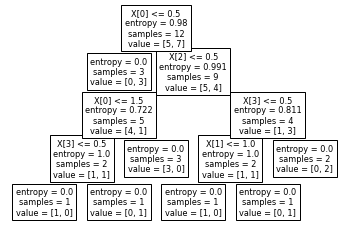

In [154]:
tree.plot_tree(dtlTennis)

6. Realiza una comparación de Naive Bayes multinomiales y gaussianos, para ello utiliza la documentación [sklearn.naive_bayes.MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) y [sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) y el conjunto de datos `diabetes.csv`. Explica tus resultados.

In [10]:
import pandas as pd

pima = pd.read_csv('diabetes.csv', index_col = 0)
pima.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [11]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


In [14]:
X = pima.drop("Outcome", axis=1).values
y = pima.Outcome.values

In [15]:
# división de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

In [18]:
from sklearn.naive_bayes import MultinomialNB
mNB = MultinomialNB()
mNB.fit(X_train, y_train)

MultinomialNB()

In [20]:
print("MultinomialNB() : ")

print("Puntaje en el conjunto de entrenamiento: %f" % mNB.score(X_train, y_train))
print("Puntaje en el conjunto de prueba: %f" % mNB.score(X_test, y_test))

MultinomialNB() : 
Puntaje en el conjunto de entrenamiento: 0.588454
Puntaje en el conjunto de prueba: 0.640693


In [32]:
mNB.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [19]:
from sklearn.naive_bayes import GaussianNB
gNB = GaussianNB()
gNB.fit(X_train, y_train)

GaussianNB()

In [21]:
print("GaussianNB() : ")

print("Puntaje en el conjunto de entrenamiento: %f" % gNB.score(X_train, y_train))
print("Puntaje en el conjunto de prueba: %f" % gNB.score(X_test, y_test))

GaussianNB() : 
Puntaje en el conjunto de entrenamiento: 0.757914
Puntaje en el conjunto de prueba: 0.744589


In [30]:
gNB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

MultinomialNB es útil para modelar vectores de entidades donde cada valor representa, por ejemplo, el número de apariciones de un término o su frecuencia relativa. Suele trabajar con variables discretas (como el conteo de palabras para clasificación de textto, en NLP).

GaussianNB es útil cuando se trabaja con valores continuos que se pueden modelar con una distribución gaussiana. 

La razón principal por la que el segundo modelo tiene mayor ventaja, es debido a que la mayoría las columnas de nuestro dataframe tienen o tienden (porque son pocos datos) a tener una distribución normal, y modelo se ajusta mucho mejor. 

A continuación vamos a graficar unos histogramas que nos darán más información de la distribución de los datos.

In [35]:
cols = pima.columns.tolist()
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

<AxesSubplot:ylabel='Frequency'>

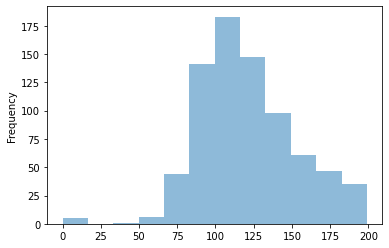

In [37]:
pima['Glucose'].plot.hist(bins=12, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

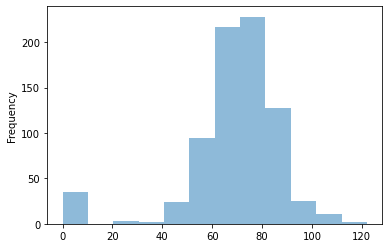

In [38]:
pima['BloodPressure'].plot.hist(bins=12, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

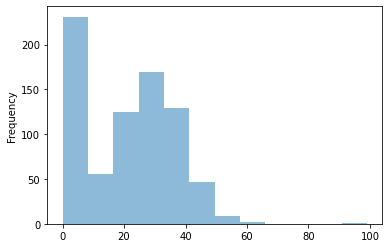

In [39]:
pima['SkinThickness'].plot.hist(bins=12, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

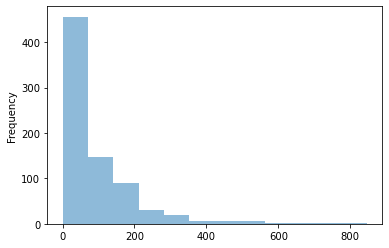

In [40]:
pima['Insulin'].plot.hist(bins=12, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

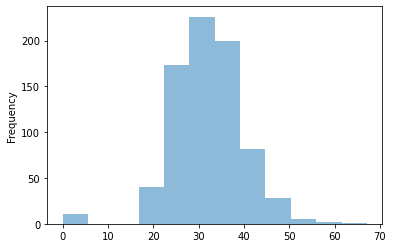

In [41]:
pima['BMI'].plot.hist(bins=12, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

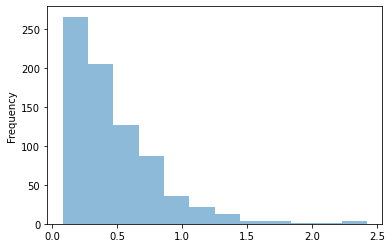

In [42]:
pima['DiabetesPedigreeFunction'].plot.hist(bins=12, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

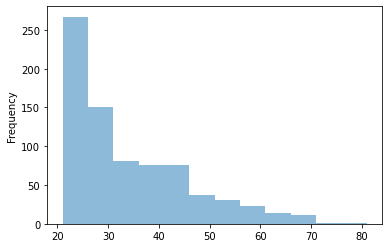

In [43]:
pima['Age'].plot.hist(bins=12, alpha=0.5)

7. Carga los valores $x$, $y$ de $20$ puntos de datos del archivo `xydata.dat`. Ajusta una línea recta a través de los datos usando la función `linregress` de `scipy.stats`. Ten en cuenta que la función `linregress` devuelve otros $3$ valores más allá de la pendiente y la intersección (use linregress?. Traza los datos y la línea recta ajustada. Agrega una leyenda. Agrega el RMSE como título del gráfico. Imprime los valores óptimos para la pendiente y la intersección de la línea recta en la pantalla.

    Realiza el procedimiento anterior con un polinomio de segundo grado (una parábola) a través de los datos usando la función `np.polyfit`.¿Mejoró el RMSE? 

    Ahora realiza el mismo procedimiento con la función `f(x)=Aexp (ax) + b` a través de los datos usando la función `curve_fit` de `scipy.optimize`. ¿Mejoró el MSE?

     Calcula los valores óptimos (en el sentido de mínimos cuadrados) de $a$ y $b$ usando la suma de errores cuadrados (usando las matrices `xdata` e `ydata` para los tres puntos dados:

    ```
    xdata = np.array([5.0, 10.0, 15.0])
    ydata = np.array([3.0, 6.0, 7.0])
    ```
      A continuación, usa la función `linregress` del paquete `scipy.stats` para calcular los valores óptimos y verifique que la función `linregress` dé las mismas respuestas. Crea una gráfica que muestra los tres puntos de datos y la línea recta ajustada.
      
Sugerencia: se puede utilizar `np.loadtxt('xydata.dat')` para cargar los datos. 

In [77]:
import matplotlib.pyplot as plt
from scipy import stats

In [89]:
data = np.loadtxt('xydata.dat')
x, y = data

In [90]:
pendiente, intercepto, r_value, p_value, std_err = stats.linregress(x, y)
print("pendiente: %f    intercepto: %f" % (pendiente, intercepto))

pendiente: 6.077444    intercepto: 42.582457


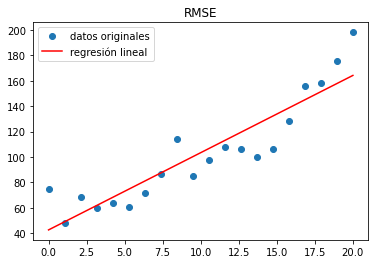

In [91]:
plt.title("RMSE")
plt.plot(x, y, 'o', label='datos originales')
plt.plot(x, intercepto + pendiente*x, 'r', label='regresión lineal')
plt.legend()
plt.show()

In [92]:
y_pred = intercepto + pendiente*x
mse = np.sum((y_pred - y)**2 ) / len(x)
print("Su MSE es: %f" % mse)

Su MSE es: 273.184838


Ahora lo ajustamos mediante un polinomio de segundo grado

In [93]:
z = np.polyfit(x, y, 2)
print("Los coeficientes del polinomio son: ", z)

Los coeficientes del polinomio son:  [ 0.3575729  -1.07401424 65.16600875]


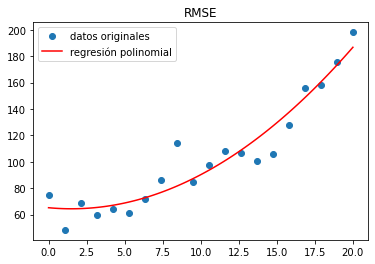

In [94]:
# ahora graficamos
xp = np.linspace(0, 20, 100)
p = np.poly1d(z)
plt.title("RMSE")
plt.plot(x, y, 'o', label='datos originales')
plt.plot(xp, p(xp), '-r', label='regresión polinomial')
plt.legend() 
plt.show()

In [95]:
y_pred = p(x)
mse = np.sum((y_pred - y)**2 ) / len(x)
print("Su MSE es: %f" % mse)

Su MSE es: 135.390827


In [96]:
from scipy.optimize import curve_fit

def func(x, A, a, b):
    return A * np.exp(a * x) + b 


In [97]:
import warnings
warnings.filterwarnings("ignore")


# curve_fit usa  mínimos cuadrados no lineales para ajustar una función
popt, pcov = curve_fit(func, x, y)
print(popt)   # retornamos los valores de 'A', a' y 'b'

[ 9.76933746  0.13389951 52.50074463]


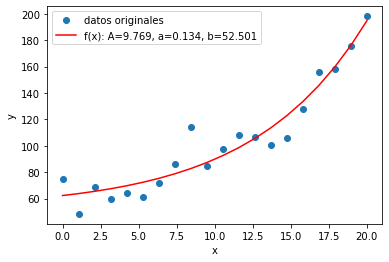

In [98]:
plt.plot(x, y, 'o', label='datos originales')
plt.plot(x, func(x, *popt), 'r-',
         label='f(x): A=%5.3f, a=%5.3f, b=%5.3f' % tuple(popt))


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [99]:
y_pred = func(x, *popt)
mse = np.sum((y_pred - y)**2 ) / len(x)
print("Su MSE es: %f" % mse)

Su MSE es: 119.079423


In [104]:
# ahora para los 3 puntos datos, veremos si el primer o el último modelo se desenpeña mejor;
# como métrica tomares el MSE de esos 3 puntos

xdata = np.array([5.0, 10.0, 15.0])
ydata = np.array([3.0, 6.0, 7.0])



y_pred_1 = intercepto + pendiente*xdata
mse_1 = np.sum((y_pred_1 - ydata)**2 ) / len(xdata)
print("MSE en el modelo de regresión lineal es: %f" % mse_1)

y_pred_3 = func(xdata, *popt)
mse_3 = np.sum((y_pred_3 - ydata)**2 ) / len(xdata)
print("MSE en el modelo de regresión no lineal es: %f" % mse_3)


MSE en el modelo de regresión lineal es: 0.222222
MSE en el modelo de regresión no lineal es: 8572.325982


#### Conclusiones:
Analizando los diferentes MSE, el modelo que mejor se desempeña entre los 3 modelos, es el último en el conjunto de datos de entrenamiento inicial. Sin embargo, para hacer inferencia sobre 3 puntos adicionales, el que tiene un menos MSE es el primer modelo. Esto se debe a que los valores de xdata e ydata son muy menores que los del dataset original con el que se entrenaron los modelos. Se podría escalar los valores para solucionar este pequeño inconveniente.

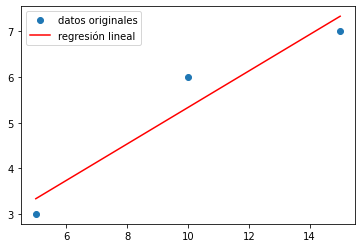

In [105]:
# Ahora en caso, solo deseemos hacer una nueva regresión lineal sobre esos 3 puntos:
pendiente, intercepto, r_value, p_value, std_err = stats.linregress(xdata, ydata)

plt.plot(xdata, ydata, 'o', label='datos originales')
plt.plot(xdata, intercepto + pendiente*xdata, 'r', label='regresión lineal')
plt.legend()
plt.show()

In [106]:
y_pred = intercepto + pendiente*xdata
mse_1 = np.sum((y_pred - ydata)**2 ) / len(xdata)
print("MSE en el modelo de regresión lineal es: %f" % mse_1)

MSE en el modelo de regresión lineal es: 0.222222


8. Opcional (no tiene puntaje): Explora la página [https://aipaygrad.es/](https://aipaygrad.es/).